# FIT WITH GAUSSIAN MIXTURE
We have a dataset containing masses of black holes. Black hole in different mass ranges have a different formation channels. We want understand from the data how many of them there are.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sklearn.mixture as mix

First, we look into the data to have an idea of the distribution:

Text(0.5, 1.0, 'Data to be fitted')

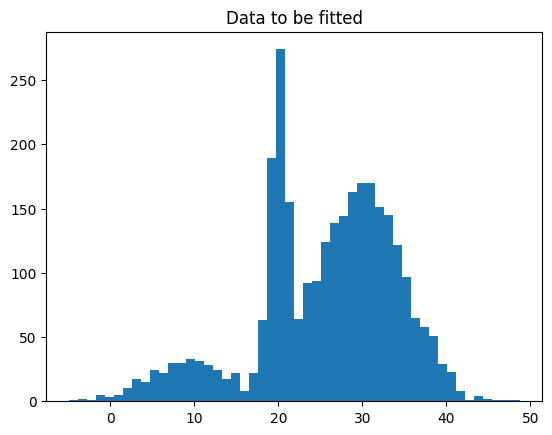

In [2]:
input = open("../solutions/formationchannels.npy", 'rb')
data = np.load(input)
x_hist = np.array([data[i][0] for i in range((data.shape)[0])])
plt.hist(x_hist, bins = 50)
plt.title("Data to be fitted")

Then we do a fit using from 1 to 10 different gaussian components. To compare the fits, we use the AIC and see which is the lowest:

Text(0.5, 1.0, 'AIC vs number of components')

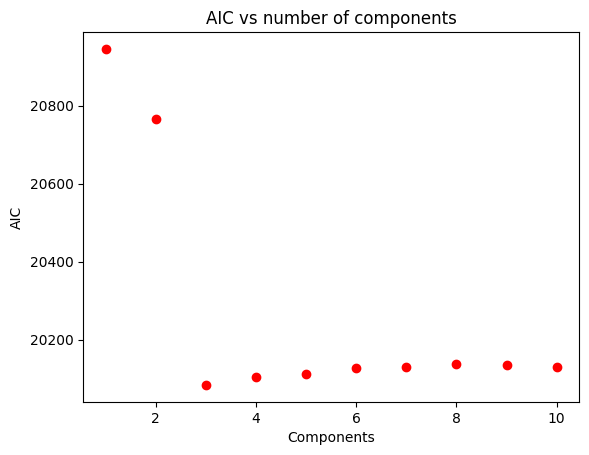

In [3]:
models = np.array([], dtype=mix.GaussianMixture)
for i in range(0, 10):
    models = np.append(models, [mix.GaussianMixture(i+1, init_params='k-means++')])
    models[i] = models[i].fit(data)

aics = np.zeros(10)
for i in range(0, 10):
    aics[i] = models[i].aic(data)

plt.plot(range(1, 11), aics, 'ro')
plt.xlabel("Components")
plt.ylabel("AIC")
plt.title("AIC vs number of components")

We plot the best fit:

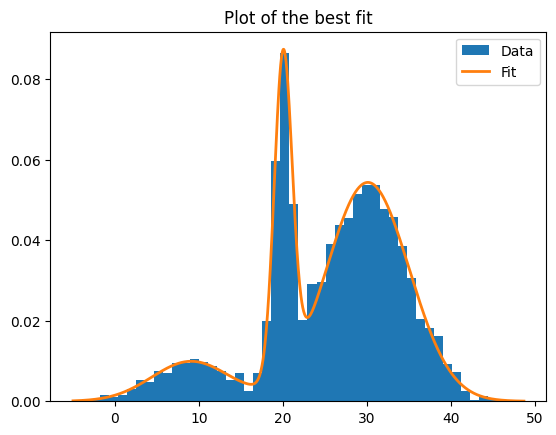

In [4]:
pref_model = models[np.argsort(aics)[0]]
x_r = np.linspace(np.min(data), np.max(data), 1000)

y_pdf = np.exp(pref_model.score_samples(x_r[:, np.newaxis]))
plt.hist(x_hist, bins = 50, density=True, label = "Data")
plt.plot(x_r, y_pdf, label = "Fit", linewidth = 2)
plt.title("Plot of the best fit")
plt.legend()

And we look also for the single components:

Text(0.5, 1.0, 'Plot of the single components')

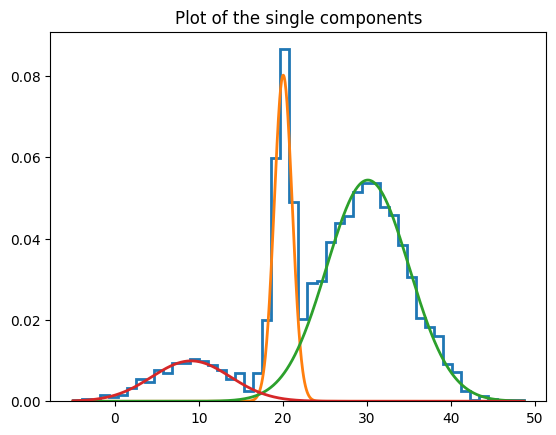

In [5]:
resp = pref_model.predict_proba(x_r[:, np.newaxis])
components = np.zeros([len(x_r), np.argsort(aics)[0] + 1])
for i in range(np.argsort(aics)[0] + 1):
    components[:, i] = resp[:, i] * np.exp(pref_model.score_samples(x_r[:, np.newaxis]))

plt.hist(x_hist, bins = 50, density=True, label = "Data", histtype="step", linewidth=2)
plt.plot(x_r, components[:, 0], linewidth = 2)
plt.plot(x_r, components[:, 1], linewidth = 2)
plt.plot(x_r, components[:, 2], linewidth = 2)
plt.title("Plot of the single components")